3. (2 бали) Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для тестування описаних вище алгоритмів (генетичний алгоритм та алгоритм зграї сірих вовків) на одновимірній тестовій одноекстремальній функції.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation

In [23]:
np.random.randint(0, 2, [20, 8]).shape

(20, 8)

In [24]:
class GeneticAl:
    def __init__(self, w:int = 8, pop_size:int = 20, child_size:int = 40, max_iter:int = 100):
        self.xa = 3
        self.xb = 5
        self.w = w

        bin_pop = np.random.randint(0, 2, [pop_size, w])
        bin_child = np.random.randint(0, 2, [child_size, w])

        X = np.zeros(pop_size + child_size)
        Fit = np.zeros(pop_size + child_size)

        best_fit_on_iter = []

        for iteration in range(max_iter):
            for i in range(child_size):
                i1 = np.random.randint(pop_size)
                i2 = np.random.randint(pop_size)
                cross = np.random.randint(w)
                if np.random.rand() < 0.5:
                    bin_child[i, :] = np.append(bin_pop[i1, :cross], bin_pop [i2, cross:])
                else:
                    bin_child[i, :] = np.append(bin_pop[i2, :cross], bin_pop [i1, cross:])
                rand_bit = np.random.randint(8)
                bin_child[i, rand_bit] = 1 - bin_child[i, rand_bit]
            bin_pop = np.append(bin_pop, bin_child, axis=0)
            for i in range(pop_size + child_size):
                X[i] = self.Dec(bin_pop[i, :])
                Fit[i] = self.f(X[i])
            ind = np.argsort(Fit)
            Fit = np.sort(Fit)
            bin_pop = bin_pop[ind, :]
            X = X[ind]
            # print(Fit[0])
            # self.plot(X[:pop_size], Fit[:pop_size])
            
            bin_pop = bin_pop[:pop_size, :]
            best_fit_on_iter.append([X[:pop_size], Fit[:pop_size]])
            # print(Fit)
        self.plot(best_fit_on_iter, max_iter)

    def f(self, x):
        return (x-self.xa)*(self.xb-x)*np.sin(20*np.pi*x)
    
    def Dec(self, bin_code):
        return self.bi2de(bin_code)/(2**self.w-1)*(self.xb-self.xa) + self.xa

    def bi2de(self, binary_array):
        return int("".join(map(str, binary_array)), 2)

    def de2bi(decimal_array, length=None):
        if length is None:
            length = max(map(lambda x: len(bin(x)[2:]), decimal_array))
        return np.array([list(map(int, np.binary_repr(n, width=length))) for n in decimal_array])

    def plot(self, best_fit_on_iter, iters):
        fig, ax = plt.subplots()
        npoints = 1000
        h = (self.xb-self.xa)/(npoints-1)
        xx = np.array(np.arange(self.xa, self.xb, h))
        yy = self.f(xx)
        # plt.close()
        plt.plot(xx, yy)
        plt.grid(True)
        plt.plot(*best_fit_on_iter[0], '.')
        def update(frame):
            fig.clear(True)
            plt.plot(xx, yy)
            plt.grid(True)
            plt.plot(*best_fit_on_iter[frame], '.')

        ani = animation.FuncAnimation(fig=fig, func=update, frames=iters, interval=30)
        ani.save(f"{self.w}w_{self.xa}a_{self.xb}b.gif", fps=10)
        # plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


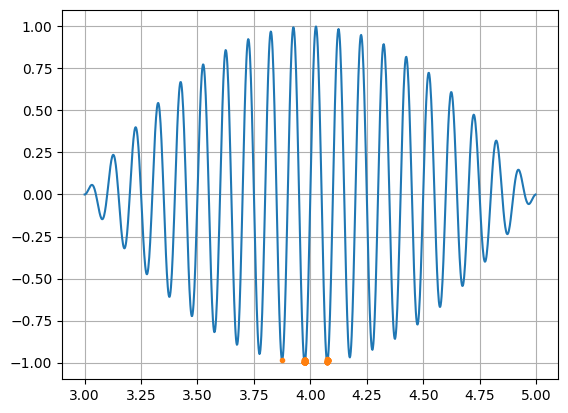

In [28]:
GeneticAl(16, 100, 200, 50)

![16w_3a_5b.gif](16w_3a_5b.gif)

In [26]:
class WolfAl:
    def __init__(self):
        pass


In [27]:
GeneticAl.de2bi([10, 20, 30], 8)

array([[0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0]])

4. (1 бал) Модифікувати програми так, щоб можна було бачити процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації.

5. (1 бал) Модифікувати програми на випадок пошуку глобального екстремуму двовимірної (багатовимірної) функції. Також показати процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації. Показати зміну положення популяції на контурному графіку для двовимірних функцій.

6. (2 бали) Для багатовимірних одноекстремальних функцій (на прикладі функції Растринга при n ≥ 3) показати лише графік пристосованості популяції (за критерієм значення функції кожного елемента популяції), а також показати графік відстані від кращого елемента популяції (значення функції) до відомого оптимального значення функції, яке вказане. Тобто в останньому в графіку по осі абсцис відкладається номер ітерації, а по осі ординат – найменше значення відстані між оптимальним значенням функції і кращим.

7. (1 бал додатковий) Обрати будь-яку іншу з функцій, що не наведені у даній лабораторній роботі, знайти її глобальний екстремум, продемонструвати відповідні результати.